In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from typing import List
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt

In [48]:
import sklearn
sklearn.__version__

'0.23.1'

In [49]:
DATA_PATH = './Data_clean.csv'

In [66]:
df = pd.read_csv(DATA_PATH)
x = df[['latitude', 'Longitude']]
y = df['rating']
df.head()

,Unnamed: 0,place_name,place_ID,latitude,Longitude,plus_code,rating,user_ratings_total,business_status,types,address
0,0,NTU North Spine Plaza,ChIJ-f-vxgoP2jERP42l8kUV8DE,1.347064,103.680822,8MWJ+R8 Singapore,4.3,1070,OPERATIONAL,shopping_mall,"76 Nanyang Dr, Singapore 637331"
1,1,Orchard Towers,ChIJ-z0z0IwZ2jERXjOtNGbV0-0,1.307229,103.829332,8R4H+VP Singapore,3.9,2292,OPERATIONAL,shopping_mall,"400 Orchard Rd, Singapore 238875"
2,2,Quayside Isle,ChIJ01fgzLUe2jERxlhvImcbZ7g,1.247681,103.842072,6RXR+3R Singapore,4.3,568,OPERATIONAL,shopping_mall,"31 Ocean Way, Singapore 098375"
3,3,Coronation Shopping Plaza,ChIJ08duKAYa2jER47-5U4ZdgAo,1.323919,103.809989,8RF5+HX Singapore,3.6,202,OPERATIONAL,shopping_mall,"587 Bukit Timah Rd, Singapore 269707"
4,4,Hougang 1,ChIJ0ZkQLVsW2jERY9DgZurtpl8,1.376061,103.879155,9VGH+CM Singapore,3.9,2183,OPERATIONAL,shopping_mall,"1 Hougang Street 91, Singapore 538692"


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
print('[INFO] Model trained.')

y_pred = model.predict(x_test.values)
y_true = y_test.values
mean_squared_error(y_true, y_pred)


[INFO] Model trained.


0.08026430581846561

In [68]:
r2_score(y_true, y_pred)

0.005063045178405723

# Normalising Data

In [52]:
weight = df['user_ratings_total']
scaler = MinMaxScaler()
x_normalised = scaler.fit(x)
x_normalised = scaler.transform(x)
x_normalised
y = np.array(y)
y = y.reshape(-1,1)
y_normalised = scaler.fit(y)
y_normalised = scaler.transform(y)


In [53]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_normalised,y_normalised, test_size=0.2)
model.fit(x_norm_train, y_norm_train)
y_norm_pred = model.predict(x_norm_test)
mean_squared_error(y_norm_test, y_norm_pred)

0.017982522564198616

In [54]:
r2_score(y_norm_test, y_norm_pred)

-0.010831120070588396

# Linear Regression with weight 

In [55]:
weight = df['user_ratings_total']

In [56]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test, weight_train, weight_test = train_test_split(x_normalised,y_normalised, weight, test_size=0.2)
model.fit(x_norm_train, y_norm_train, weight_train)
y_norm_pred_weight = model.predict(x_norm_test)
mean_squared_error(y_norm_test, y_norm_pred_weight, weight_test)

C:\Users\MEHAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass sample_weight=30      3199
149       80
214     2170
318      400
188      109
23        33
46       775
40      5456
133      219
157     6133
84        11
269      585
191    16432
290     1329
48      6269
286        9
256      512
314      234
210      196
16      1880
198      868
102     4022
145     9046
10        12
141     3218
106        9
212      778
303      989
83       232
196    13031
       ...  
100     2128
62      4587
278     2626
313        8
35     12639
56        18
76       232
77      2438
189     3774
179      455
123     1289
223       15
95       219
41        13
160        6
88       124
171      181
47      1005
12     19934
208       30
282     2113
194      155
267       94
27      1170
24       544
163      319
216      304
225       96
66      1286
134     1273
Name: user_ratings_total, Length: 67, dtype: int64 as keyword args. From version 0.25 passing thes

0.003935238126071373

In [57]:
r2_score(y_norm_test, y_norm_pred_weight, weight_test)

C:\Users\MEHAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass sample_weight=30      3199
149       80
214     2170
318      400
188      109
23        33
46       775
40      5456
133      219
157     6133
84        11
269      585
191    16432
290     1329
48      6269
286        9
256      512
314      234
210      196
16      1880
198      868
102     4022
145     9046
10        12
141     3218
106        9
212      778
303      989
83       232
196    13031
       ...  
100     2128
62      4587
278     2626
313        8
35     12639
56        18
76       232
77      2438
189     3774
179      455
123     1289
223       15
95       219
41        13
160        6
88       124
171      181
47      1005
12     19934
208       30
282     2113
194      155
267       94
27      1170
24       544
163      319
216      304
225       96
66      1286
134     1273
Name: user_ratings_total, Length: 67, dtype: int64 as keyword args. From version 0.25 passing thes

0.041128255349262566

# Adding relevance to find DCG score

In [72]:
df['relevance']=0

In [73]:
def compute_relevance(dataframe):
    for i in range(len(dataframe)):
        if dataframe['user_ratings_total'][i] <= 50:
            if 0 <= dataframe['rating'][i] <= 3.5:
                dataframe['relevance'][i] = 0
            elif 3.5 <= dataframe['rating'][i] <= 4.5:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2
        else:
            if 0 <= dataframe['rating'][i] <= 2:
                dataframe['relevance'][i] = 0
            elif 2 <= dataframe['rating'][i] <= 4:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2

In [74]:
compute_relevance(df)

C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryi

In [75]:
df.to_csv('new_dataset.csv')

In [76]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.9269658250786467
NDCG@10 = 0.8101987172083424
NDCG@20 = 0.7386560323315534


In [79]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='Predicted Score', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,2,1.498481
1,2,1.488382
2,2,1.475038
3,1,1.474017
4,2,1.469165
5,1,1.453986
6,1,1.441556
7,1,1.437352
8,2,1.429436
9,1,1.419060


0.0
5.0


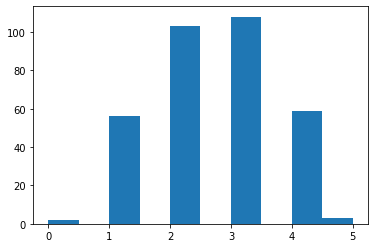

In [80]:
rating = df['rating']
users = df['user_ratings_total']
relevance = round(np.ceil(np.log(users)*rating)/10)
print(min(relevance))
print(max(relevance))
plt.hist(relevance)
df['relevance'] = relevance

In [81]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.7393032236658311
NDCG@10 = 0.6575129396237868
NDCG@20 = 0.700485948707044


In [84]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='True Relevance', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,5.0,2.470688
1,4.0,2.505261
2,4.0,2.526448
3,4.0,2.560829
4,4.0,2.380526
5,4.0,2.369172
6,4.0,2.787109
7,3.0,2.577059
8,3.0,2.518755
9,3.0,2.645645
